**The dataset that I created for clothing item identification has all images and labels files in single folder, here in this file im randomly going to split them into train and test portion and after that Im going to prepare the directory structure that is required for YoloV5.**

##Mounting The Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Necessary Libraries

In [45]:
import os
import shutil
import pandas as pd

##Preparation Of Data

In [31]:
path = '/content/gdrive/MyDrive/Project/IIT Bombaby /D2'
dir = os.listdir(path)

In [32]:
dataset = pd.DataFrame(columns=['Image_File_Name', 'Label_File_Name'])

In [34]:
i=0
for file_name in dir:
  if file_name[-3:]== 'txt':
    dataset.loc[i] = [f'{file_name[:-4]}.jpg', file_name]
    i = i+1
print('done')    

done


In [36]:
dataset.head()

,Image_File_Name,Label_File_Name
0,0c_(1).jpg,0c_(1).txt
1,0ck.jpg,0ck.txt
2,0ew_(1).jpg,0ew_(1).txt
3,0g02_3_back.jpg,0g02_3_back.txt
4,0io_(1).jpg,0io_(1).txt


##Splitting  The Data Into Train & Test

In [40]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(dataset, test_size=0.1, random_state=42)

In [58]:
print(f'Train Data Size: {len(Train)}')

Train Data Size: 586


In [59]:
print(f'Test Data Size: {len(Test)}')

Test Data Size: 66


##Moving The Files

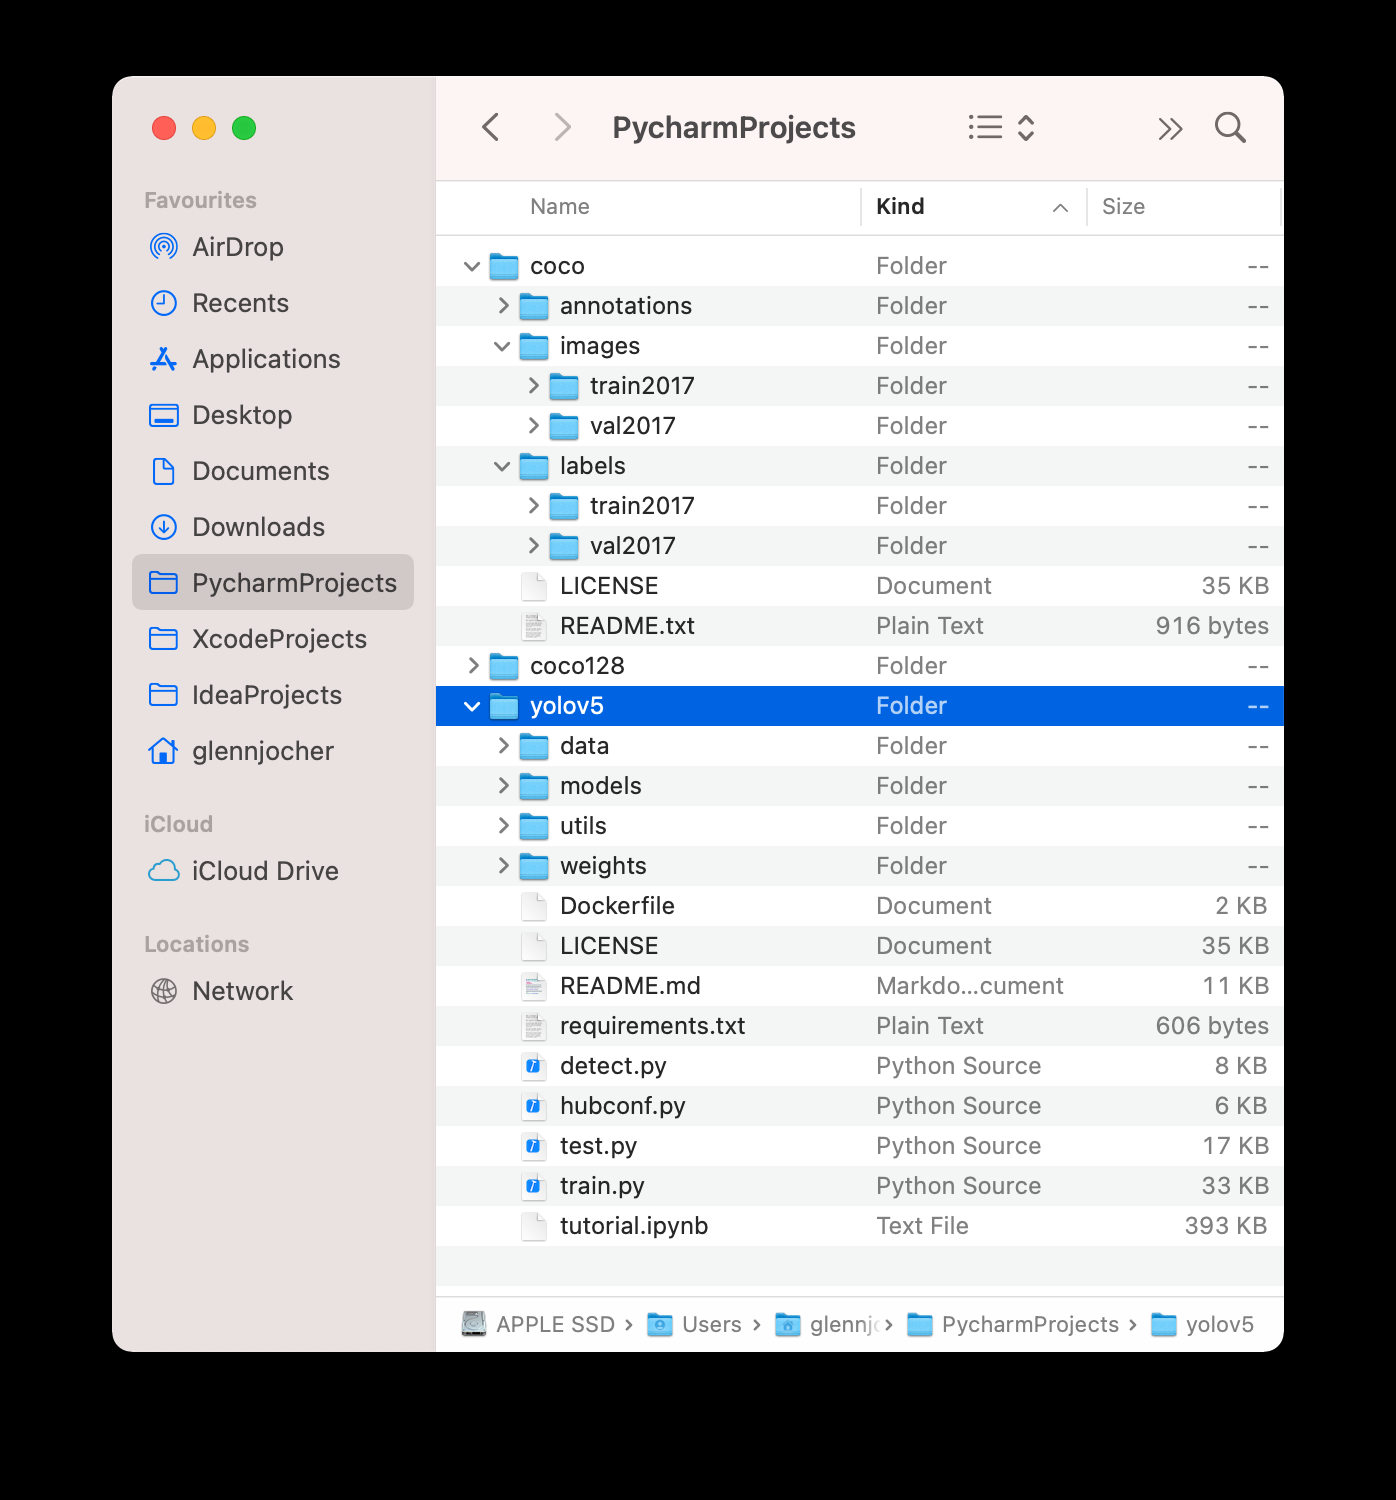

In [55]:
images_train_path = '/content/Clothing_Dataset/Images/Train'
labels_train_path  = '/content/Clothing_Dataset/Labels/Train'

for image, label in zip(Train['Image_File_Name'], Train['Label_File_Name']):
  image_path = os.path.join(path,image)
  label_path = os.path.join(path,label)
  shutil.move(image_path, images_train_path)
  shutil.move(label_path, labels_train_path)
print('Done')  

Done


In [60]:
images_test_path = '/content/Clothing_Dataset/Images/Test'
labels_test_path  = '/content/Clothing_Dataset/Labels/Test'

for image, label in zip(Test['Image_File_Name'], Test['Label_File_Name']):
  image_path = os.path.join(path,image)
  label_path = os.path.join(path,label)
  shutil.move(image_path, images_test_path)
  shutil.move(label_path, labels_test_path)
print('Done')  

Done


In [62]:
!sudo apt-get install tree -qq > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


##Directories Tree

In [65]:
!tree Clothing_Dataset -L 2

Clothing_Dataset
├── Images
│   ├── Test
│   └── Train
└── Labels
    ├── Test
    └── Train

6 directories, 0 files


##Moving The Dataset To Drive

In [70]:
!mv /content/Clothing_Dataset /content/gdrive/MyDrive/Project/IIT_Bombaby/ 